# Project: Finding Donors for ChrityML

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with '**Implementation**' in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a '**Question X**' header. Carefully read each question and provide thorough answers in the following text boxes that begin with '**Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

이 프로젝트에서는 1994 년 미국 인구 조사에서 수집한 데이터를 사용하여 개인의 소득을 정확하게 모델링하기 위해 여러 지도 알고리즘을 사용한다. 그런다음 예비 결과에서 최상의 후보 알고리즘을 선택하고 이 알고리즘을 최적화하여 데이터를 가장 잘 모델링한다. 이 구현의 목표는 개인의 5만 달러 이상을 벌어들일지 정확하게 예측하는 모델을 만드는 것이다. 이러한 종류의 일은 기부금으로 운영되는 비영리 단체에서 발생할 수 있다. 개인의 수입을 이해하면 비영리 단체가 기부금을 얼마나 많이 요구하는지 이해할 수 있으며 처음부터 손을 뻗을지 여부를 더 잘 이해할 수 있다. 개인의 일반 소득 계층을 공개 소스에서 직접 결정하는 것은 어려울 수 있지만, 공개적으로 사용 가능한 다른 기능에서 이 값을 추론할 수 있다.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "*Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid*". You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.

이 프로젝트의 데이터 세트는 [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income)에서 가져왔다. 이 데이터 세트는 Ron Kohavi와 Barry Becker가 "*Naive-Bayes 분류기의 정확도 향상: 의사결정 트리 하이브리드*" 라는 기사에 기고 된 후 기증하였다. Ron Kohavi의 기사를 [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)에서 읽어볼 수 있다.

---

## Exproring the Data

Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, 'income', will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

아래의 code cell을 실행하여 필요한 Python 라이브러리를 로드하고 센서스 데이터를 로드하라. 이 데이터 세트의 마지막 열, 'income'은 개인이 연간 $50,000 이상을 버는 지 여부에 상관없이 우리의 목표 라벨이 된다. 다른 모든 열은 센서스 데이터베이스의 각 개인에 대한 기능이다.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Impelmentation: Data Exploration

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, '`n_records`'
- The number of individuals making more than \$50,000 annually, '`n_greater_50k`'.
- The number of individuals making at most \$50,000 annually, '`n_at_most_50k`'.
- The percentage of individuals making more than \$50,000 annually, '`greater_percent`'.

데이터 세트의 간단한 조사로 어느 그룹에 얼마나 많은 사람들이 들어갈 수 있는지를 결정할 수 있으며, 이 사람들이 \$50,000 이상을 쓰는 비율을 알려준다. 아래의 code cell에서, 다음을 계산할 필요가 있다:

- 총 레코드 수, 'n_records'.
- 매년 \$50,000 이상을 벌어들이는 사람의 수, 'n_greater_50k'.
- 매년 최대 \$50,000 를 벌어들이는 사람의 수, 'n_at_most_50k'.
- 매년 \$50,000 이상을 벌어들이는 사람들의 비율, 'greater_percent'.

In [2]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0 * n_greater_50k / n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


**Featureset Exploration**

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

---

## Preparing the Data

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

데이터를 기계 학습 알고리즘의 입력으로 사용할 수 있기 전에 데이터를 정리, 형식 지정 및 재구성해야한다 — 일반적으로 **전처리**로 알려져 있다. 다행히 이 데이터 세트에는 처리해야한는 유효하지 않거나 누락된 항목이 없지만 조정해야하는 특정 기능에 대한 몇 가지 특성이 있다. 이 전처리는 거의 모든 학습 알고리즘의 결과와 예측럭을 대폭적으로 향상시킬 수 있다.

### Transforming Skewed Continuous Features

A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'.

데이터 세트에는 값이 단일 숫자 근처에 있는 경향이 있지만 그 단일 숫자보다 크게 크거나 작은 값의 중요하지 않은 숫자가 있는 특성을 적어도 하나 이상 포함하는 경우가 있다. 알고리즘은 이러한 값 분포에 민감 할 수 있으며 범위가 적절하게 표준화되지 않으면 성능이 저하 될 수 있다. 센서스 데이터 세트에서는 'capital-gain'과 'capital-loss'이라는 두 가지 feature가 적합하다.

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

아래 code cell을 실행시켜 두 feature의 히스토그램을 나타내어라. 현재 값의 범위와 그 값의 분산 방식에 유의해라.

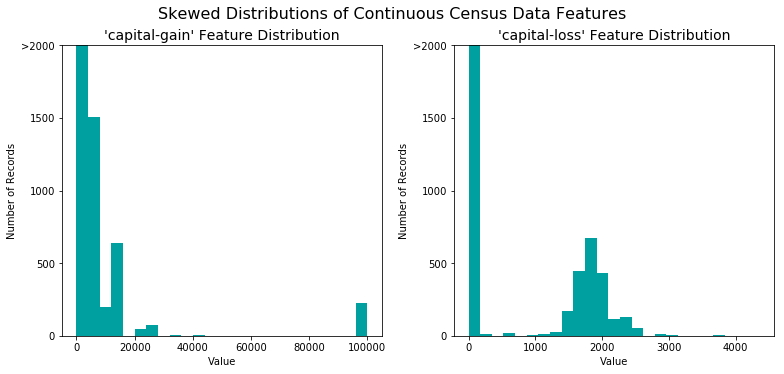

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

'capital-gain' 및 'capital-loss'와 같이 고도로 왜곡된 feature 분포의 경우 매우 큰 값과 매우 작은 값이 학습 알고리즘의 성능에 부정적인 영향을 주지 않도록 데이터에 <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">로그 변환</a>을 적용하는 것이 일반적이다. 로그 변환을 사용하면 이상치로 인한 값 범위가 크게 줄어든다. 그러나 이 변환을 적용 할 때는 주의해야한다: 0의 로그는 정의되지 않으므로 로그를 성공적으로 적용하려면 0보다 작은 양만큼 값을 변환해야한다.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed.

아래의 code cell을 실행하여 데이터 변환을 수행하고 결과를 시각화하라. 다시 말하지만, 값의 범위와 분산 방법에 유의해라.

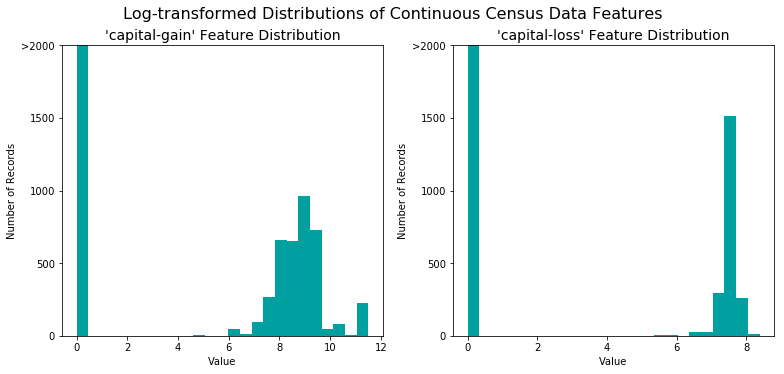

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Feature

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature;s distribution (such as 'capital-gain' or 'capital-losss' above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, ovserving the data in its raw form will no longer have the same original meaning, as exammpled below.

크게 왜곡된 features에 대한 변환을 수행하는 것 외에도 숫자 feature에 대한 일부 유형의 비율 조정을 수행하는 것이 좋다. 데이터에 스케일링을 적용해도 각 feature의 모양이 바뀌지 않는다.(예:위의 'cap) 그러나 정규화는 지도 대상 학습자를 적용할 때 각 features가 동등하게 취급되도록 한다. 스케일링이 적용되면 원시 형식의 데이터를 관찰하는 것이 더 이상 원래의 의미와 다를 수 있다. 아래에 설명되어 있다.

Run the code cell below to normalize each numerical feature. We will use [sklearn.preprocessing.MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

아래의 code cell을 실행하여 각 숫자 feature들을 정규화하여라. 우린 이것을 위해 [sklearn.preprocessing.MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)를 사용할 것이다.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. **One-hot encoding** creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

**Exploring the Data**에 있는 테이블에서 숫자가 아닌 각 레코드에 대한 몇 가지 기능이 있음을 알 수 있다. 일반적으로 학습 알고리즘에서는 입력을 숫자로 예상하므로 숫자가 아닌 feature(카테고리 변수라고 함)를 변환해야한다. 범주형 변수를 변환하는 한 가지 일반적인 방법은 one-hot encoding 체계를 사용하는 것이다. **One-hot encoding**은 숫자가 아닌 각 feature의 가능한 범주마다 "dummy" 변수를 만든다. 예를 들어 someFeature가 A, B, C의 세 가지 항목을 가질 수 있다고 가정하자. 그런 다음 이 feature를 someFeature_A, someFeature_B, someFeature_C로 인코딩한다.


|   | **someFeature** |                         | **someFeature_A** | **someFeature_B** | **someFeature_C** |
|:-:|:-----------:|:-----------------------:|:-------------:|:-------------:|:-------------:|
| 0 |      B      |                         |       0       |       1       |       0       |
| 1 |      C      | ---> one-hot encode ---> |       0       |       0       |       1       |
| 2 |      A      |                         |       1       |       0       |       0       |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, 'income' to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. In code cell below, you will need to implement the following:
- Use [pandas.get_dummies()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the 'features_raw' data.
- Convert the target label 'income_raw' to numerical entries.
    - Set records with "<=50K" to 0 and records with ">50K" to 1.

또한 숫자가 아닌 기능과 마찬가지로 숫자가 아닌 대상 레이블인 'income'을 학습 알고리즘이 작동하는 숫자 값으로 변환해야한다. 이 레이블에는 가능한 두 가지 범주 ( "<=50K" 및  ">50K")가 있으므로 한 핫 인코딩을 사용하지 않고 이 두 범주를 각각 0과 1로 인코딩하면된다. 아래 code cell에서 다음을 구현하라.
- [pandas.get_dummies()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)를 사용하여 'features_raw' 데이터에 대해one-hot encoding을 실행하라.
- 타겟 라벨인 'income_raw'를 숫자 성분으로 전환하라.
    - "<=50K"를 0으로 ">50K"를 1으로 레코드를 설정하라.

In [6]:
import pandas as pd
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


---

## Evaluating Model Performance

In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive* predictor.

### Metrics and the Naive Predictor

CharityML, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, &ast;CharityML&ast; is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that does not make more than \$50,000 as someone who does would be detrimental to &ast;CharityML&ast;, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is more important than the model's ability to **recall** those individuals. We can use **F-beta** score as a metric that considers both precision and recall:

$$ F_\beta  = (1+\beta ^2)\cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision)+recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **$F_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the naive prediction for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors.

**Note: Recap of accuracy, precision, recall**

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).


### Question 1 - Naive Predictor Performance
- If we chose a model that always predicted an individual made more than $50,000, what would that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to 'accuracy' and 'fscore' to be used later.


- 우리가 개인이 $50,000 이상을 만들었다고 항상 예측했던 모델을 선택했다면, 이 데이터세트에 대한 그 모델의 정확도와 F-점수는 무엇인가? 아래 code cell을 사용하고 결과를 'accuracy'와 'fscore'로 지정해야 나중에 사용할 수 있다.

In [8]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = float(n_greater_50k) / (n_greater_50k + n_at_most_50k) 

precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

recall = n_greater_50k / (n_greater_50k + 0)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * accuracy * recall / (beta**2 * accuracy + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Supervised Learning Models
**The following are some of the supervised learning models that are currently available in [scikit-learn](http://scikit-learn.org/stable/supervised_learning.html) that you may choose from:**

- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application

List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied.
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer:** 

   *Ensemble Methods: AdaBoost*
   - Real-world application: The AdaBoost is used in the areas of video and image recognition. A real world example of AdaBoost is object detection in image: Applcication of AdaBoost Algorithm in Basketball Player Detection. [refernece](https://www.uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf)
   - Strength: The error rate is low and the code is easy. It classifies with the best classifier, and there is no parameter for adjustment. [reference](https://www.slideshare.net/YonghoonKwon1/07-45214373)
   - Weakness: Sensitive to error data. [reference](https://www.slideshare.net/YonghoonKwon1/07-45214373)
   - Candidacy: AdaBoost is good for this problem because it will be able to take the full dataset and be able to generate a strong learner by analyzing the relationships between the various features and their effect on the probability of income.
   
   
   *SVM (Support Vector Machines) *
   - Real-world application: SVM is applied to image recognition with a very large dimension space (considering the value of each pixel of the image as an attribute). The learning data is a group of instances that is a labeled human face image and learns a model that predicts the label of a new instance that has not been seen.
   - Strength: It is very efficient when the space to learn is high-dimensional property space. It is also efficient from the viewpoint of memory space.
   - Weakness: There is a limit to the number of data that is not affected by time only for linear classification.
   - Candidacy: This model can still be a good candidate as there seems to be some features in the data that can more clearly define the income level boundary.


   *Decision Trees*
   - Real-world application: Fire Probability Prediction Based on Weather Information Using Decision Tree[reference](http://www.dbpia.co.kr/Journal/ArticleDetail/NODE02283313)
   - Strength: It is very useful for data mining applications because it has the advantage of being able to easily understand and explain the results and to use it directly in decision making. 
   - Weakness: When the characteristics of the data can not be divided vertically / horizontally into specific variables, the classification rate is lowered and the tree becomes complicated. Decision trees do not guarantee optimal solutions for using the greedy approach.
   - Candidacy: For this data set the decision tree model performs well because there is a large and clean dataset of binary labels.

### Implementation - Creating a Training and Predicting Pipeline

To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section. In the code block below, you will need to implement the following:
- Import `fbeta_score` and `accuracy_score` from [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
- Fit the learner to the sampled training data and record the training time.
- Perform predictions on the test data X_test, and also on the first 300 training points X_train[:300].
    - Record the total prediction time.
- Calculate the accuracy score for both the training subset and testing set.
- Calculate the F-score for both the training subset and testing set.
    - Make sure that you set the beta parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in '`clf_A`', '`clf_B`', and '`clf_C`'.
    - Use a '`random_state`' for each model you use, if provided.
    - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
    - Store those values in '`samples_1`', '`samples_10`', and '`samples_100`' respectively.

code cell에서 다음을 구현해야 한다.
- 이전 섹션에서 논의한 3가지 지도 학습 모델을 import하라.
- 세 모델을 초기화하고 '`clf_A`', '`clf_B`', '`clf_C`'에 저장하라.
    - 제공되는 경우 사용하는 각 모델에 대해 '`random_state`'를 사용하라.
    - **참고:** 각 모델의 기본 설정을 사용하라. 나중에 특정 모델을 조정할 것이다.
- 훈련 데이터의 1%, 10% 및 100%와 같은 레코드 수를 계산하라.
    - 그 값들을 각각 '`samples_1`', '`samples_10`', '`samples_100`'에 저장하라.


**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
LinearSVC trained on 361 samples.
LinearSVC trained on 3617 samples.
LinearSVC trained on 36177 samples.


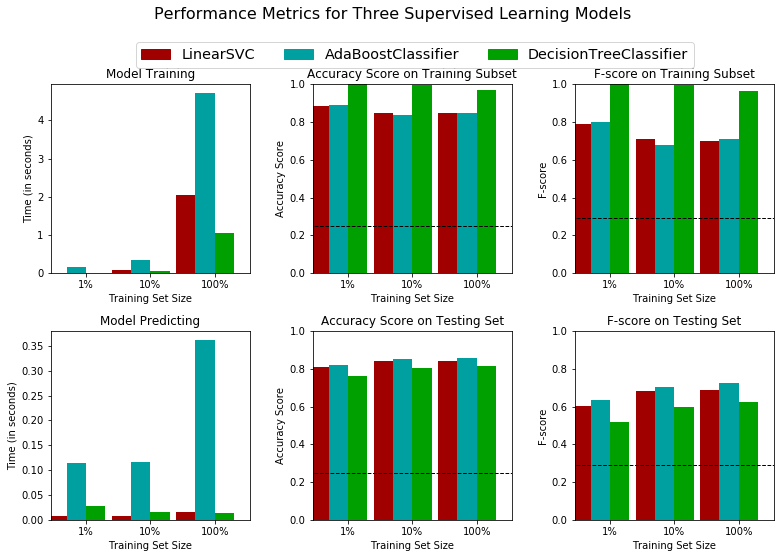

In [10]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state = 101)
clf_B = DecisionTreeClassifier(random_state = 101)
clf_C = LinearSVC(random_state = 101)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_1 = len(X_train)/100
samples_10 = len(X_train)/10
samples_100 = len(X_train)


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

---
## Improving Results

In this final section, you will choose from the three supervised learning models the best model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F-score.

이 마지막 섹션에서는 세 가지 지도 학습 모델 중에서 학생 데이터에 사용할 최상의 모델을 선택하게 된다. 그런 다음 하나 이상의 매개 변수를 조정하여 조정되지 않은 모델의 F-점수를 향상시킴으로써 전체 트레이닝 집합(X_train 및 y_train)에 대한 모델의 그리드 검색 최적화를 수행한다.

### Question 3 - Choosing the Best Model
- Based on the evaluation you performed earlier, in one to two paragraphs, explain to CharityML which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.

- 앞에서 수행 한 평가를 토대로, 1 ~ 2 단락에서 CharityML에 대해 \$50,000 이상을 산출하는 개인을 식별하는데 가장 적합한 것으로 생각되는 모델을 설명하십시오.

**Answer:** *The AdaBoost Clssifier has the highest F-score in the test when 100% of training data is used. It is therefore best suited to identify individuals who make more than \$50,000 more than the other two models. As can be seen from the above graphs, it is the most appropriate map learning model  because of high accuracy and F-score.*


### Question 4 - Describing the Model in Layman's Terms
- In one to two paragraphs, explain to CharityML, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

- 1 ~ 2 단락에서 CharityML에게 평신도의 용어로 선택한 최종 모델이 어떻게 작동해야하는지 설명하십시오. 모델을 훈련하는 방법 및 모델이 예측하는 방법과 같이 모델의 주요 특성을 설명해야합니다. 방정식 설명과 같은 고급 수학 전문 용어를 사용하지 마십시오.

**Answer:** 
    1. Collect: All the way
    2. Preparation: It depends on the type of weak learner we use. Use decision-making stumps to process all types of data.
    3. Analysis: All the way
    4. Training: Most of the time consumed at this stage. The classifier trains weak learners several times with the same data set.
        - Trained as a weak classifier to extract incorrectly classified cases and correctly classified cases
        - Correctly categorized examples will lower the weight and raise the weight if it is misclassified.
        - After the weight vector D is calculated, it is repeated AdaBoost.
        - Adjust the training and the weight until the error reaches zeor or the number of weak classifiers reaches a maximum.
    5. Inspection: Error rate calculation
    6. Like SVM, AdaBoost also predicts one of the classification items (SVM should be used when there are more than two classification items).
    


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [sklearn.grid_search.GridSearchCV](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [sklearn.metrics.make_scorer](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
    - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
    - Example: `parameters = {'parameter' : [list of values]}.`
    - **Note:** Avoid tuning the max_features parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the '`scorer`', and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train, y_train`), and store it in `grid_fit`.


선택한 모델을 미세 조장하라. 적어도 세 가지 다른 값으로 조정된 적어도 하나의 중요한 매개 벼수가 있는 그리드 검색(`GridSearchCV`)을 사용하라. 이를 위해 전체 트레이닝 집합을 사용해야 한다. 아래 code cell에서 다음을 구현하라.
- [sklearn.grid_search.GridSearchCV](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) 와 [sklearn.metrics.make_scorer](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)를 import하라.
- 선택한 분류기를 초기화하고 `clf`에 저장하라.
    - 이전에 설정한 것과 동일한 상태로 사용할 수 있는 경우 `random_state`를 설정하라.
- 선택한 모델을 조정하려는 매개 변수의 딕셔너리를 만든다.
    - 예: `parameters = {'parameter' : [list of values]}.`
    - **참고:** 해당 매개 변수가 사용 가능한 경우 학습자의 max_features 매개 변수를 조정하지 마라!
- `make_scorer`를 사용하여 `fbeta _score` 채점 객체를 만든다($\beta = 0.5$).
- '`scorer`'를 사용하여 분류기 `clf`에서 그리드 검색을 수행하고 `grid_obj'에 저장하라.
- 그리드 검색 개체를 트레이닝 데이터 (`X_train, y_train`)에 맞추어 `grid_fit`에 저장한다.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [11]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Initialize the classifier
clf = AdaBoostClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"n_estimators": [1, 50, 100], "learning_rate": [1, 0.5, 0.1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, cv = 10, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8606
Final F-score on the testing data: 0.7316


### Question 5 - Final Model Evaluation
- What is your optimized model's accuracy and F-score on the testing data?
- Are these scores better or worse than the unoptimized model?
- How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_


- 테스트 데이터에 최적화된 모델의 정확도와 F-점수는 무엇인가?
- 이 점수는 최적화되지 않은 모델보다 좋은가 나쁜가?
- 최적화된 모델의 결과는 ** Question 1** 에서 이전에 발견한 나이브 예측 벤치마크와 어떻게 비교되는가?

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

**Results:**

|   **Metric**   |**Benchmark Predictor**|**Unoptimized Model**|**Optimized Model** |
|:--------------:|:-------------------:|:-----------------:|:---------------:|
| Accuracy Score |         0.2478      |       0.8576      |     0.8606      |
|     F-score    |         0.2917      |       0.7246      |     0.7316      |

**Answer:**
- The optimized model's accuracy and F-score on the testing data are 0.8606 and 0.7316.
- These scores are better than the unoptimized model.
    - Unoptimized model's accuracy(0.8576) $<$ Optimized model's accuracy(0.8606)
    - Unoptimized model's F-score(0.7246) $<$ Optimized model's F-score(0.7316)
- The results from the optimized model are significantly higher than the naive predictor benchmarks.
    - Benchmark Predictor's accuracy(0.2478) $<<$ Optimized model's accuracy(0.8606)
    - Benchmark Predictor's F-score(0.2917) $<<$ Optimized model's F-score(0.7316)

---

## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

센서스 데이터와 같은 데이터 집합에 대한 지도 학습을 수행 할 때 중요한 작업은 어떤 기능이 가장 뛰어난 예측 능력을 제공하는지 결정하는 것이다. 몇 가지 중요한 기능과 대상 레이블 간의 관계에 초점을 맞춤으로써 현상에 대한 이해를 단순화한다. 이는 항상 가장 유용하다. 이 프로젝트의 경우 개인이 최대 \$50,000 이상을 벌어 들일지를 가장 강력하게 예측할 수있는 몇 가지 기능을 식별하고자한다.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

선택한 분류 기준에 따라 feature의 중요도를 평가하는 기능인 `feature_importance_` 속성이있는 scikit-learn 분류기 (예 : adaboost, 랜덤 포레스트)를 선택한다. 다음 python cell에서는 이 분류기를 트레이닝 집합에 맞추고 이 속성을 사용하여 센서스 데이터 집합의 가장 중요한 5 가지 주요 features를 결정합니다.

### Question 6 - Feature Relevance Observation

When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Exploring the Data**에서는 인구 조사 데이터에 기록된 각 개인에 대해 13 개의 사용 가능한 features가 있음이 나타났다.. 이 13 가지 기록 중에서 어떤 다섯 가지 features가 예측에 가장 중요하다고 생각하며 어떤 순서로 순위를 정할것인가? 그리고 그 이유는 무엇인가?

**Answer:**
1. occupation: Higher wages and lower wage jobs can be identified according to different job categories.
2. hours-per-week: Part-time or unemployed people are likely to earn almost
3. education: I think society is an important feature because it has a high probability of income level difference depending on college graduation and master's degree.
4. age: The age at retirement age must be considered as income is low. On the other hand, people in their 40s and 50s are more likely to have higher incomes. \$50,000 in income. You can also estimate the income quintile by categorizing people with a lot of working time and low working hours.
5. capital-gain: Those with more capital gains can earn more than 50k and can classify capital-loss as well as those with lower incomes.


### Implementation - Extracting Feature Importance

Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.
In the code cell below, you will need to implement the following:
- Import a supervised learning model from sklearn if it is different from the three used earlier.
- Train the supervised model on the entire training set.
- Extract the feature importances using '`.feature_importances_`'.


`feature_importances_` 속성을 사용할 수있는 `scikit-learn` 지도 학습 알고리즘을 선택하라. 이 속성은 선택한 알고리즘을 기반으로 예측을 수행 할 때 각 feature의 중요도를 순위 지정하는 기능이다.
아래 code cell에서 다음을 구현하라.
- 이전에 사용 된 3 가지 모델과 다른 경우 sklearn에서 지도 학습 모델을 가져옵니다.
- 전체 트레이닝 세트에서 지도된 모델을 교육하십시오.
- '`.feature_importances_`'를 사용하여 feature 중요도를 추출합니다.

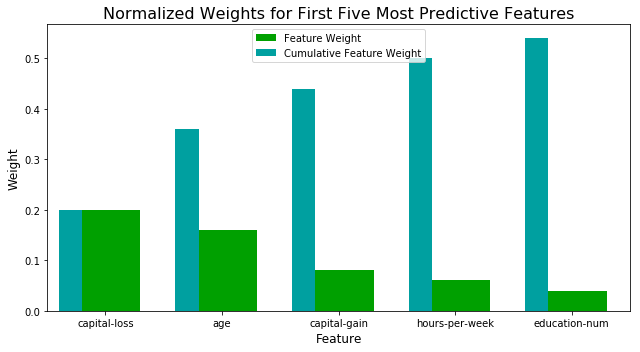

In [17]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.
- How do these five features compare to the five features you discussed in **Question 6**?
- If you were close to the same answer, how does this visualization confirm your thoughts?
- If you were not close, why do you think these features are more relevant?

**Answer:**
- 다섯 가지 중에 두 가지를 제외하고 다 맞추었다. 아쉬운 것은 가장 중요한 feature으로 education을 골랐는데 위의 결과를 보니까 education-num 이었다. 연속적인 feature라는 것을 눈치채지 못하였다. 그리고 내가 예상한 occupation feature는 위의 그래프에 나타나지 않았다. 다행인 것은 hours-per-week과 age에 대한 순위는 어느정도 똑같다는 것이다. 그렇지만 **Question 6**의 대답에서는 capital-gain만을 제시하였다.
- Out of the five, two were met. Unfortunately, I chose 'education' as the most important feature. I did not notice that 'education-num' was a continuous feature. And the 'occupation' feature I expected was not shown in the above graph. Fortunately, the rankings for 'hours-per-week' and 'age' are same with this visulaization. However, in the answer to **Question 6**, only capital-gain is presented.
- The above graph shows that I agree with the idea that there is a high possibility to classify income levels according to 'hours-per-week', 'age', and 'education-num'.
- 'capital-gain' and 'capital-loss' have more predictive power than occupation, because the capital features are completely numeric data column whereas 'occupation' is not.


### Feature Selection

How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*.

사용 가능한 모든 feature의 부분 집합만 데이터에 사용하면 모델은 어떻게 수행되는가? 트레이닝에 필요한 feature이 적기 때문에 트레이닝 및 예측 시간이 훨씬 단축된다. 위의 시각화를 통해 가장 중요한 5 가지 주요 feature가 데이터에있는 ** 모든 ** feature의 중요성 중 절반 이상을 차지한다는 것을 알 수 있다. 이것은 우리가 feature 공간을 줄이고 모델이 학습하는 데 필요한 정보를 단순화하려고 시도 할 수 있음을 암시한다. 아래의 code cell은 이전에 찾은 것과 동일한 최적화된 모델을 사용하고 *중요한 다섯 가지 주요 feature*만 사용하여 동일한 트레이닝 세트에서 훈련한다.

In [18]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8606
F-score on testing data: 0.7316

Final Model trained on reduced data
------
Accuracy on testing data: 0.8325
F-score on testing data: 0.6752


### Question 8 - Effects of Feature Selection
- How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
- If training time was a factor, would you consider using the reduced data as your training set?

- 모든 feature를 사용했을 때의 동일한 점수와 비교한 경우에 5 가지 feature만을 사용한 최종 모델의 F-점수와 정확도는 어떻게 되는가?
- 트레이닝 시간이 중요한 요소라면, 감소된 데이터를 트레이닝 세트로 사용하는 것이 좋은가?

**Answer:**
- 최적화된 전체 데이터 모델보다 모델 수행이 악화되었다. 주목할 가치가 있는 점은 기본 개매 변수가 있는 최적화 되지 않은 모델의 성능이 조금 향상되었다는 것이다.
    - The accuracy (full data): 0.35% higher
    - The F-score (full data): 0.96% higher
    - The accuracy (reduced data): 3.26% lower
    - The F-score (reduced data): 7.7% lower
- 감소된 데이터는 성능이 악화되기 때문에 전체 데이터 모델을 트레이닝 세트로 사용할 것이다. 훈련 시간을 고려하더라도, 최적화되지 않은 모델은 상대적으로 빠르며, 전체 데이터 세트에 대한 훈련 및 예측은 1 초 미만입니다.
- Reduced data will use the entire data model as a training set because performance will deteriorate. Even though training time is taken into account, non-optimized models are relatively fast, and training and predicting for the entire data set is less than a second.